In [1]:
import pandas as pd
pd.options.mode.copy_on_write = True
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Estadísticas de Casos Sometidos.csv")

df['Cantidad'] = pd.to_numeric(df['Cantidad'], errors='coerce')
df = df.dropna(subset=['Cantidad'])

In [3]:
def limpiar_datos (columna: str, expresionRegular: str, palabra_clave: str, modo):
    global df
    global listColumnas
    
    if modo == 1:
        condicion = df[columna].str.contains(expresionRegular)
    else:
        condicion = df[columna].isin(listColumnas) == False
    df.loc[condicion, columna] = palabra_clave

In [4]:
listColumnas = []
# Limpieza de delitos
dictCrimenes = {
    "Intento/Tentativa de crimen": 
        r'[Ii]ntent|[Tt]entativa|[Dd]ifamac|[Ii]ncit',
    'Amenaza': 
        r'[Aa]menaza',
    "Asociación/Cómplice en un crimen": 
        r'[Aa]sociaci|[Cc][óo¢]mplice|[Cc]omplic',
    "Delitos sexuales": 
        r'[Ss]exua|[Ii]ncesto|[Aa]cos|[Pp]roxenetismo|[Pp]rostituc|[Pp]ornograf[íi¢]a|[Ss]educc|Exhibicionismo',
    "Delitos sobre alimentos": 
        r'[Aa]limen',
    'Agresión': 
        r'[Vv]iole|[Gg]olpe|[Aa]gre|[Dd]a.os? [Gg]r|^Ri.as?$|V/domestica|[Tt]ortur|[Mm]altr',
    'Posesión de drogas': 
        r'[Dd]roga|[Mm]arihuana|[Cc]oca|[Ss]ustancia|[Hh]ookah',        
    'Homicidios y suicidios': 
        r'[Hh]omicidio|[Aa]sesinato|[Ii]nfantici|[Ee]nvenenamiento|[Ss]uicidio',
    'Posesión de armas blancas y/o de fuego': 
        r'[Aa]rma|Delito [Dd]e [Pp]ort|[Uu]so [Dd]e [Aa]rm',
    'Abusos': 
        r'[Aa]buso',
    "Delitos sobre tecnología e información": 
        r'[Aa]lta [Tt]|[Ll]ey [Dd]elito|[Uu]so [Dd]isposi|[Cc]onfid|[Aa]cceso [Ii]l[í]cito|[Uu]so de datos',
    'Robo/Secuestro de bienes y/o personas': 
        r'[Rr]obo|[Pp]enetr|[Aa]traco|[Pp]erdi|[Ss]ecuestr|[Ss]ustracc|Desaparicion|[Dd]esa',
    'Daños a propiedad privada': 
        r'[Aa]jen[ao]|[Dd]estrucci|[Oo]tro [Dd]ue[ñn]o|[Dd]año',
    'Estafa': 
        r'[Ee]stafa|[Jj]uego',
    "Fraude":
        r'[Ff]alse|[Ff]als|[Cc]olora|[Ff]raud|[Rr]eproduzc|[Rr]egistra|[Ii]mitaci.?n |Lavad|[Pp]ropied',
    "Violación o incumplimiento a las leyes y reglamentos": 
        r'[Vv]io|[Ii]nfracc|[Nn]o [Rr]eal|[Ii]ncumpl|[Ll]ey|[Tt]rabajo [Rr]ealiza|[Aa]rt|\(\d|[Cc].digo|^[Dd]erec|[Pp]ena|[Mm]edic|[Rr]egla|[Jj]uzgado|171'
}
for palabraClave, expresionRegular in dictCrimenes.items():
    limpiar_datos("Delito", expresionRegular, palabraClave, 1)
    listColumnas.append(palabraClave)    
limpiar_datos("Delito", r'\s?', "Otros", 2)

In [5]:
# Limpieza de meses
limpiar_datos("Mes", r'Abril', "Abril", 1)

In [6]:
# Limpieza de provincias
dictProvincias = {
    "Bahoruco":
        r'ruco',
    "Dajabón":
        r'[Dd]aja',
    "Distrito Nacional":
        r'[Dd]ist',
    "Duarte":
        r'[Ff]ranc|Duarte',
    "El Seibo":
        r'[Ss]eib',
    "Elías Piña": 
        r'[Ee]l.as',
    "Espaillat":
        r'Espaillat',
    "Hato Mayor":
        r'Hato',
    "Hermanas Mirabal":
        r'[Hh]ermana',
    "María Trinidad Sánchez":
        r'[Mm]ar.a',
    "Monseñor Nouel":
        r'[Mm]onse',
    "Monte Cristi":
        r'[Cc]risti',
    "La Altagracia":
        r'^[Ll]a [Aa]lta',
    "La Romana":
        r'[Rr]omana',
    "La Vega":
        r'[Vv]ega',
    "Peravia":
        r'Peravia',
    "Puerto Plata":
        r'[Pp]ue',
    "Samaná":
        r'[Ss]aman',
    "San Cristóbal":
        r'[Cc]rist.bal|Villa',
    "Santo Domingo":
        r'[Dd]omingo',
    "San José de Ocoa":
        r'[Ss]an [Jj]o',
    "San Juan":
        r'[Ll]as [Mm]a|[Jj]uan',
    "San Pedro de Macorís":
        r'[Pp]edro',
    "Sánchez Ramírez":
        r'[Rr]am[ií]',
    "Santiago Rodríguez":
        r'[Rr]odrigu',
    "Santiago de los Caballeros":
        r'Santiago$|Caballeros'
}

for palabraClave, expresionRegular in dictProvincias.items():
    limpiar_datos("Provincia", expresionRegular, palabraClave, 1)

In [7]:
from pandas import DataFrame

def ajustesGraficos (df_grafico: DataFrame, agrupacion: str, umbralDelitos: int, tamanho: tuple, tipo: str, titulo: str, xLabel: str, yLabel: str):
    df_agrupado = df_grafico.groupby(agrupacion)['Cantidad'].sum()    
    df_filtrado = df_agrupado[df_agrupado >= umbralDelitos]
    
    plt.figure(figsize=tamanho)
    df_filtrado.sort_values(ascending=False).plot(kind=tipo)

    plt.title(titulo)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()

def graficarDelitosProvincias (df: pd.DataFrame, provinciaSeleccionada: str, umbralDelitos: str, tamanho: tuple, tipo: str, xLabel: str, yLabel: str):
    df_provincia = df[df['Provincia'] == provinciaSeleccionada]

    titulo = f'Proporción de Delitos en {provinciaSeleccionada} con más de {umbralDelitos} casos'
    ajustesGraficos(df_provincia, "Delito", umbralDelitos, tamanho, tipo, titulo, xLabel, yLabel)

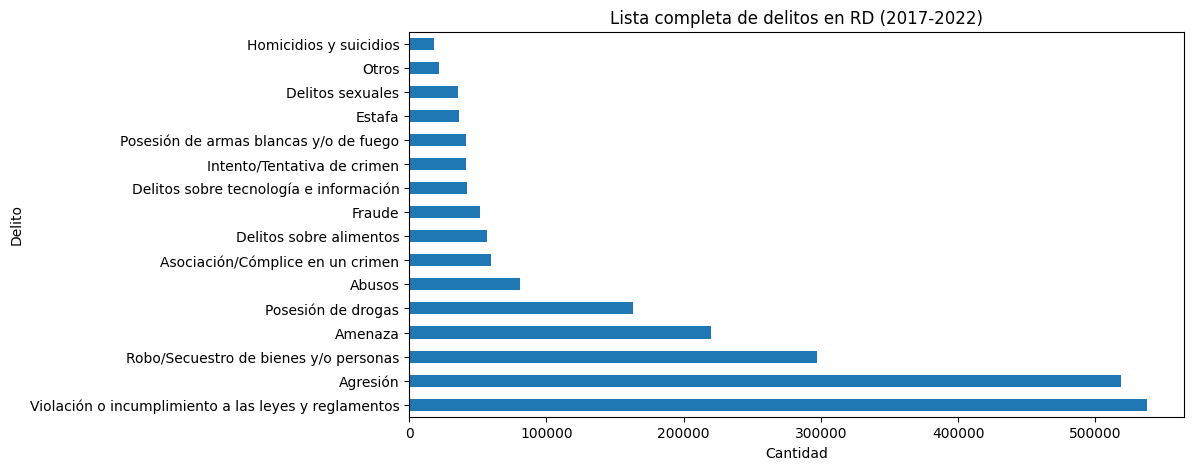

In [8]:
ajustesGraficos(df, "Delito", 0, (10, 5), 'barh', "Lista completa de delitos en RD (2017-2022)", 'Cantidad', 'Delito')

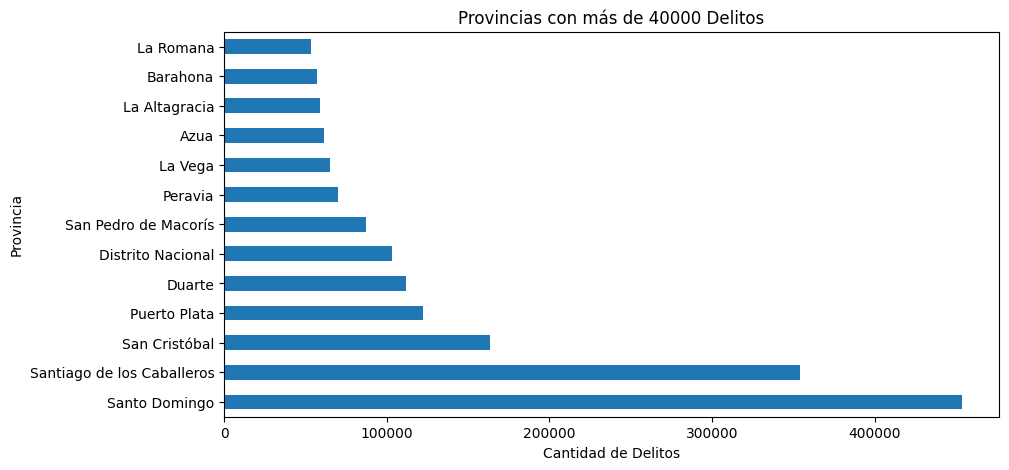

In [9]:
umbral_delitos = 40000 
titulo = f'Provincias con más de {umbral_delitos} Delitos'

ajustesGraficos(df, "Provincia", umbral_delitos, (10, 5), 'barh', titulo, 'Cantidad de Delitos', 'Provincia')

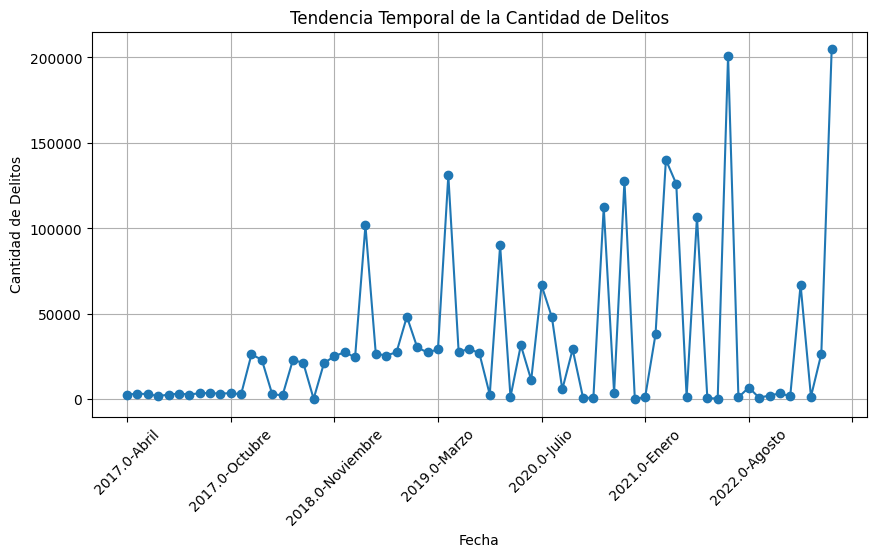

In [10]:
# Gráfico de líneas:
# Tendencia temporal de la cantidad de delitos
plt.figure(figsize=(10, 5))
df['Fecha'] = df['Año'].astype(str) + '-' + df['Mes']
df.groupby('Fecha')['Cantidad'].sum().plot(kind='line', marker='o')
plt.grid(True)
plt.title('Tendencia Temporal de la Cantidad de Delitos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.show()

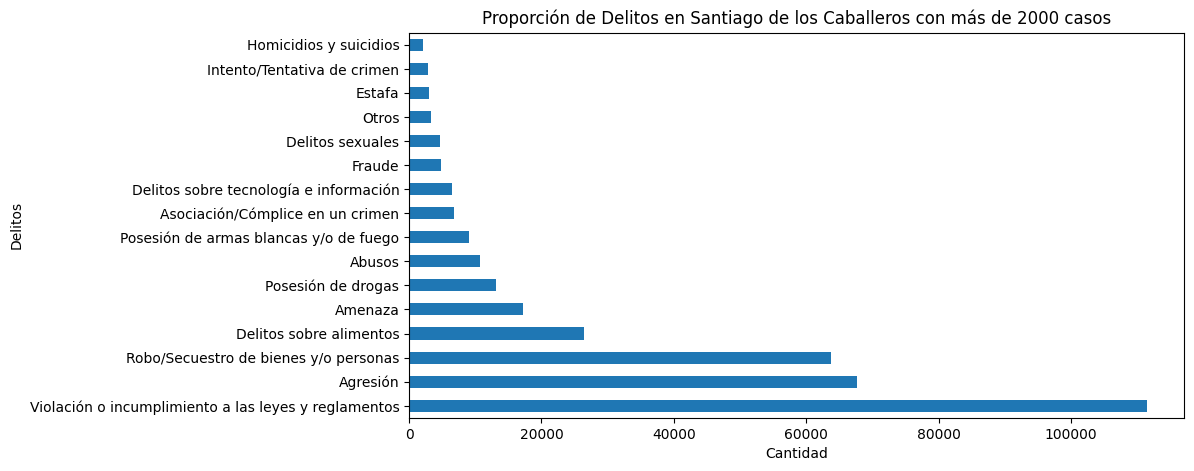

In [14]:
graficarDelitosProvincias(df, "Santiago de los Caballeros", 5000, (10, 5), 'barh', "Cantidad", "Delitos")

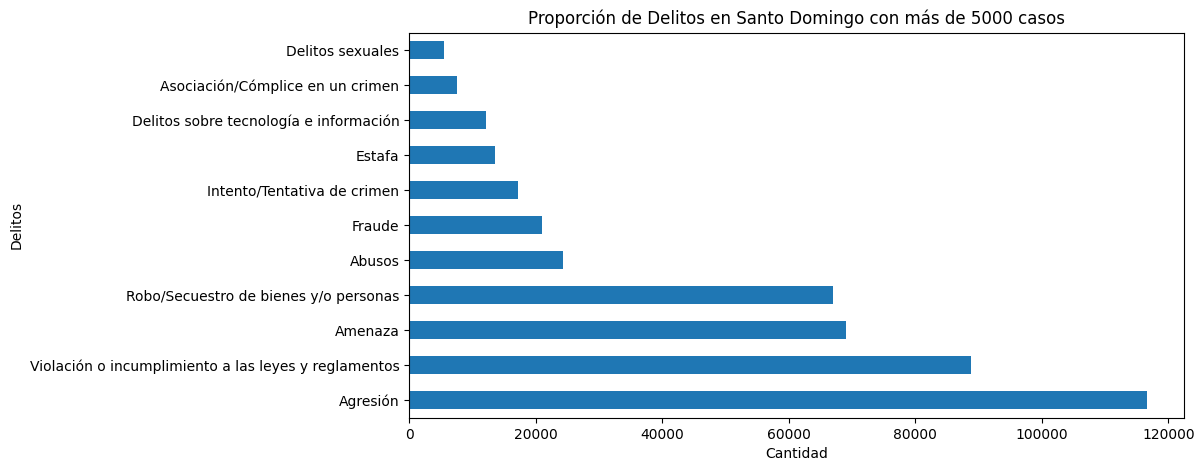

In [19]:
graficarDelitosProvincias(df, "Santo Domingo", 2000, (10, 5), 'barh', "Cantidad", "Delitos")